<a href="https://colab.research.google.com/github/yhp2205/2023Project/blob/main/Note/shoppingEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## shopping trends 데이터로 geopandas 이용해보기

#### geopy로 위도 경도 출력 및 데이터 파일 저장

In [ ]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

shoppingPath = '/content/drive/MyDrive/2023 구글클라우드인공지능과정/코드/Project/shopping_trends.csv'
shoppingUpdatePath = '/content/drive/MyDrive/2023 구글클라우드인공지능과정/코드/Project/shopping_trends_updated.csv'

In [ ]:
shopping = pd.read_csv(shoppingPath)

shopping.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [ ]:
shopping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [ ]:
shopping.isnull().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
shopping.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')

In [ ]:
heatmap_data = shopping[['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases']]

In [ ]:
shopping['Age'].sum()

171867

[Text(0, 0, 'Male'), Text(1, 0, 'Female')]

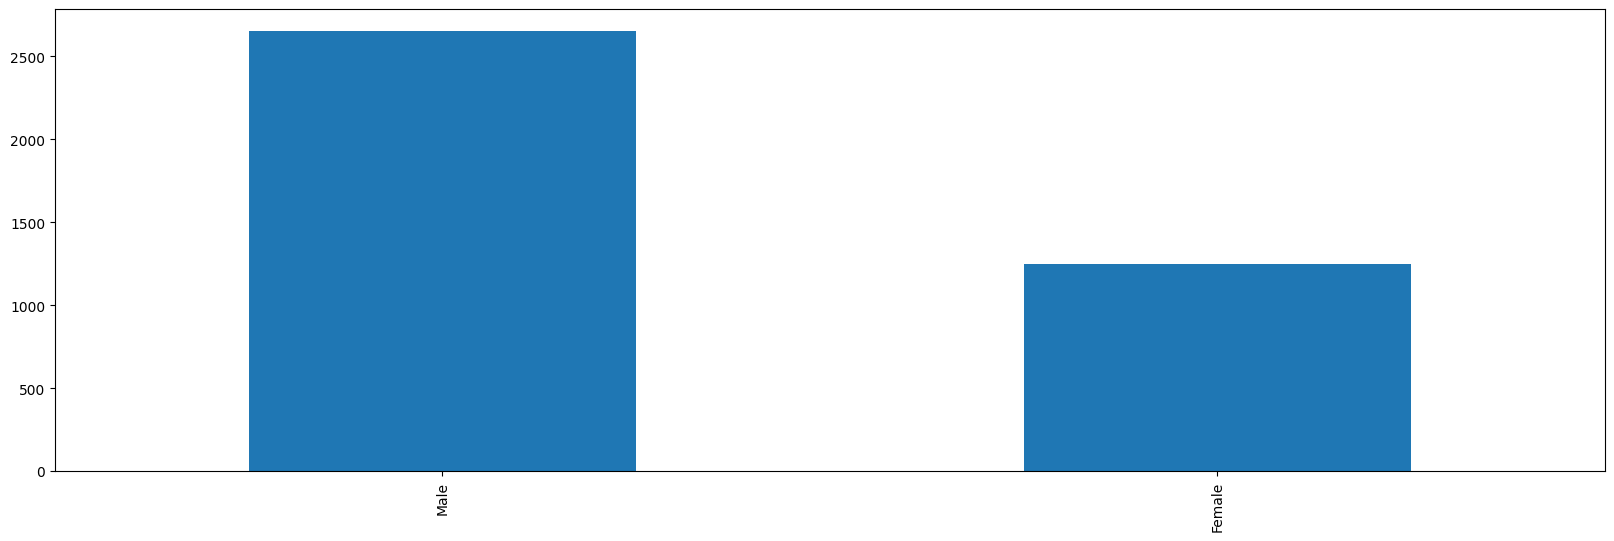

In [ ]:
plt.figure(figsize = (20, 6))
ax = shopping['Gender'].value_counts().plot(kind = 'bar')
ax.set_xticklabels(('Male', 'Female'))

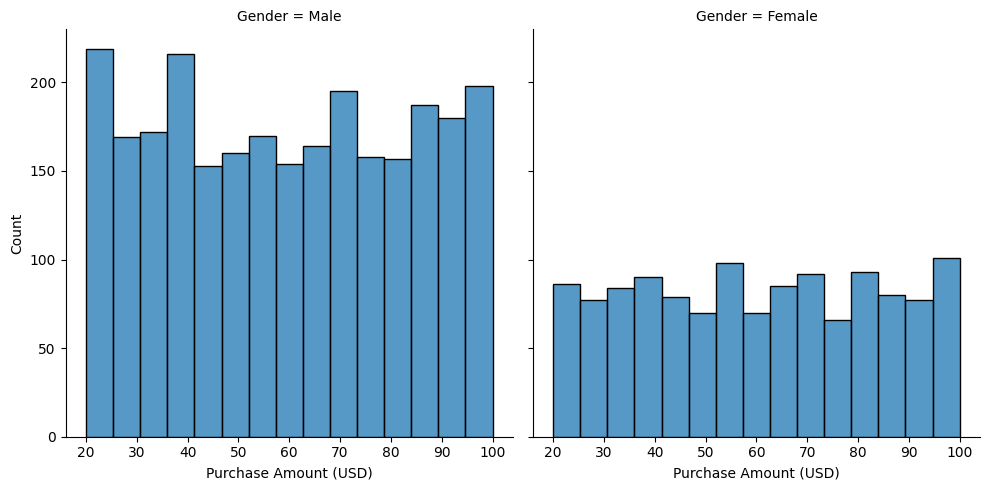

In [ ]:
sns.displot(data = shopping, x = 'Purchase Amount (USD)', col = 'Gender')

In [ ]:
!pip install geopy

from geopy.geocoders import Nominatim
from tqdm import tqdm

In [ ]:
def geocoding(address):
    try :
        geo_local = Nominatim(user_agent='USA')
        location = geo_local.geocode(address)
        geo = [location.latitude, location.longitude]
        return geo

    except :
        return[0, 0]

for idx,Location in enumerate(tqdm(shopping.Location)):
    shopping.loc[idx,'latitude'] = geocoding(Location)[0]
    shopping.loc[idx,'longitude'] = geocoding(Location)[1]

100%|██████████| 3900/3900 [1:08:34<00:00,  1.05s/it]


In [ ]:
shopping.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,latitude,longitude
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,...,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly,37.572603,-85.155141
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,...,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly,45.709097,-68.859020
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,...,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly,42.378877,-72.032366
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,...,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly,41.796241,-71.599237
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,...,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually,43.979280,-120.737257


In [ ]:
!pip install geopandas

import requests
import json
import os
import math
import time
import pandas as pd
import numpy as np
import geopandas as gpd
import folium
import matplotlib.pyplot as plt

from shapely.geometry import mapping, shape, Point, Polygon, LineString
from folium import plugins
from folium.plugins import MarkerCluster, HeatMap

import pandas
import geopandas
import folium

In [ ]:
lan_log = pd.DataFrame(shopping, columns = ['latitude', 'longitude'])

In [ ]:
PATH = '/content/drive/MyDrive/2023 구글클라우드인공지능과정/코드/Project/lan_log.xlsx'
#lan_log.to_excel(PATH, encoding='cp949', index = False)

In [ ]:
lan_log = pd.read_excel(PATH)
lan_log

,latitude,longitude
0,37.572603,-85.155141
1,45.709097,-68.859020
2,42.378877,-72.032366
3,41.796241,-71.599237
4,43.979280,-120.737257
...,...,...
3895,37.123224,-78.492772
3896,41.921673,-93.312270
3897,40.075738,-74.404162
3898,45.989659,-94.611329


In [ ]:
len(lan_log)

3900

In [ ]:
shopping['Location'].value_counts()

Montana           96
California        95
Idaho             93
Illinois          92
Alabama           89
Minnesota         88
Nebraska          87
New York          87
Nevada            87
Maryland          86
Delaware          86
Vermont           85
Louisiana         84
North Dakota      83
Missouri          81
West Virginia     81
New Mexico        81
Mississippi       80
Indiana           79
Georgia           79
Kentucky          79
Arkansas          79
North Carolina    78
Connecticut       78
Virginia          77
Ohio              77
Tennessee         77
Texas             77
Maine             77
South Carolina    76
Colorado          75
Oklahoma          75
Wisconsin         75
Oregon            74
Pennsylvania      74
Washington        73
Michigan          73
Alaska            72
Massachusetts     72
Wyoming           71
Utah              71
New Hampshire     71
South Dakota      70
Iowa              69
Florida           68
New Jersey        67
Hawaii            65
Arizona      

In [ ]:
center = [37.090, -99.712]
map = folium.Map(
    location=center,
    zoom_start=3,
    )

map
# MarkerCluster
marker_cluster = MarkerCluster().add_to(map)

#maker add
for _, row in lan_log.iterrows():
  try:
    folium.Marker(
        location=[row["latitude"], row["longitude"]], # location
        # popup=row["customer"], #popup
        icon=folium.Icon(color="black", icon="user", prefix="fa")
    ).add_to(marker_cluster)
  except:
    pass

map

In [ ]:
#lan_log transform for list
lan_logL = lan_log.values.tolist()

In [ ]:
# center setting
center = [37.090, -95.712]
map2 = folium.Map(
    location=center,
    zoom_start=3,
    )
#make a heatmap here
map2 = map2.add_child(plugins.HeatMap(lan_logL, radius = 20))
map2